In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
vehicle_data=pd.read_csv('vehicle.csv')

In [3]:
vehicle_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
vehicle_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


#### Converting the Class column from Object to float

In [6]:
vehicle_data['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [7]:
vehicle_data['class'] = vehicle_data['class'].replace({'van':1, 'car':2, 'bus':3})
vehicle_data['class'] = vehicle_data['class'].astype('float64')

#### Finding Null values and treating them

In [8]:
vehicle_data.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [9]:
Missing_filler=lambda x: x.fillna(x.mean())
vehicle_data=vehicle_data.apply(Missing_filler,axis=0)

In [10]:
vehicle_data.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

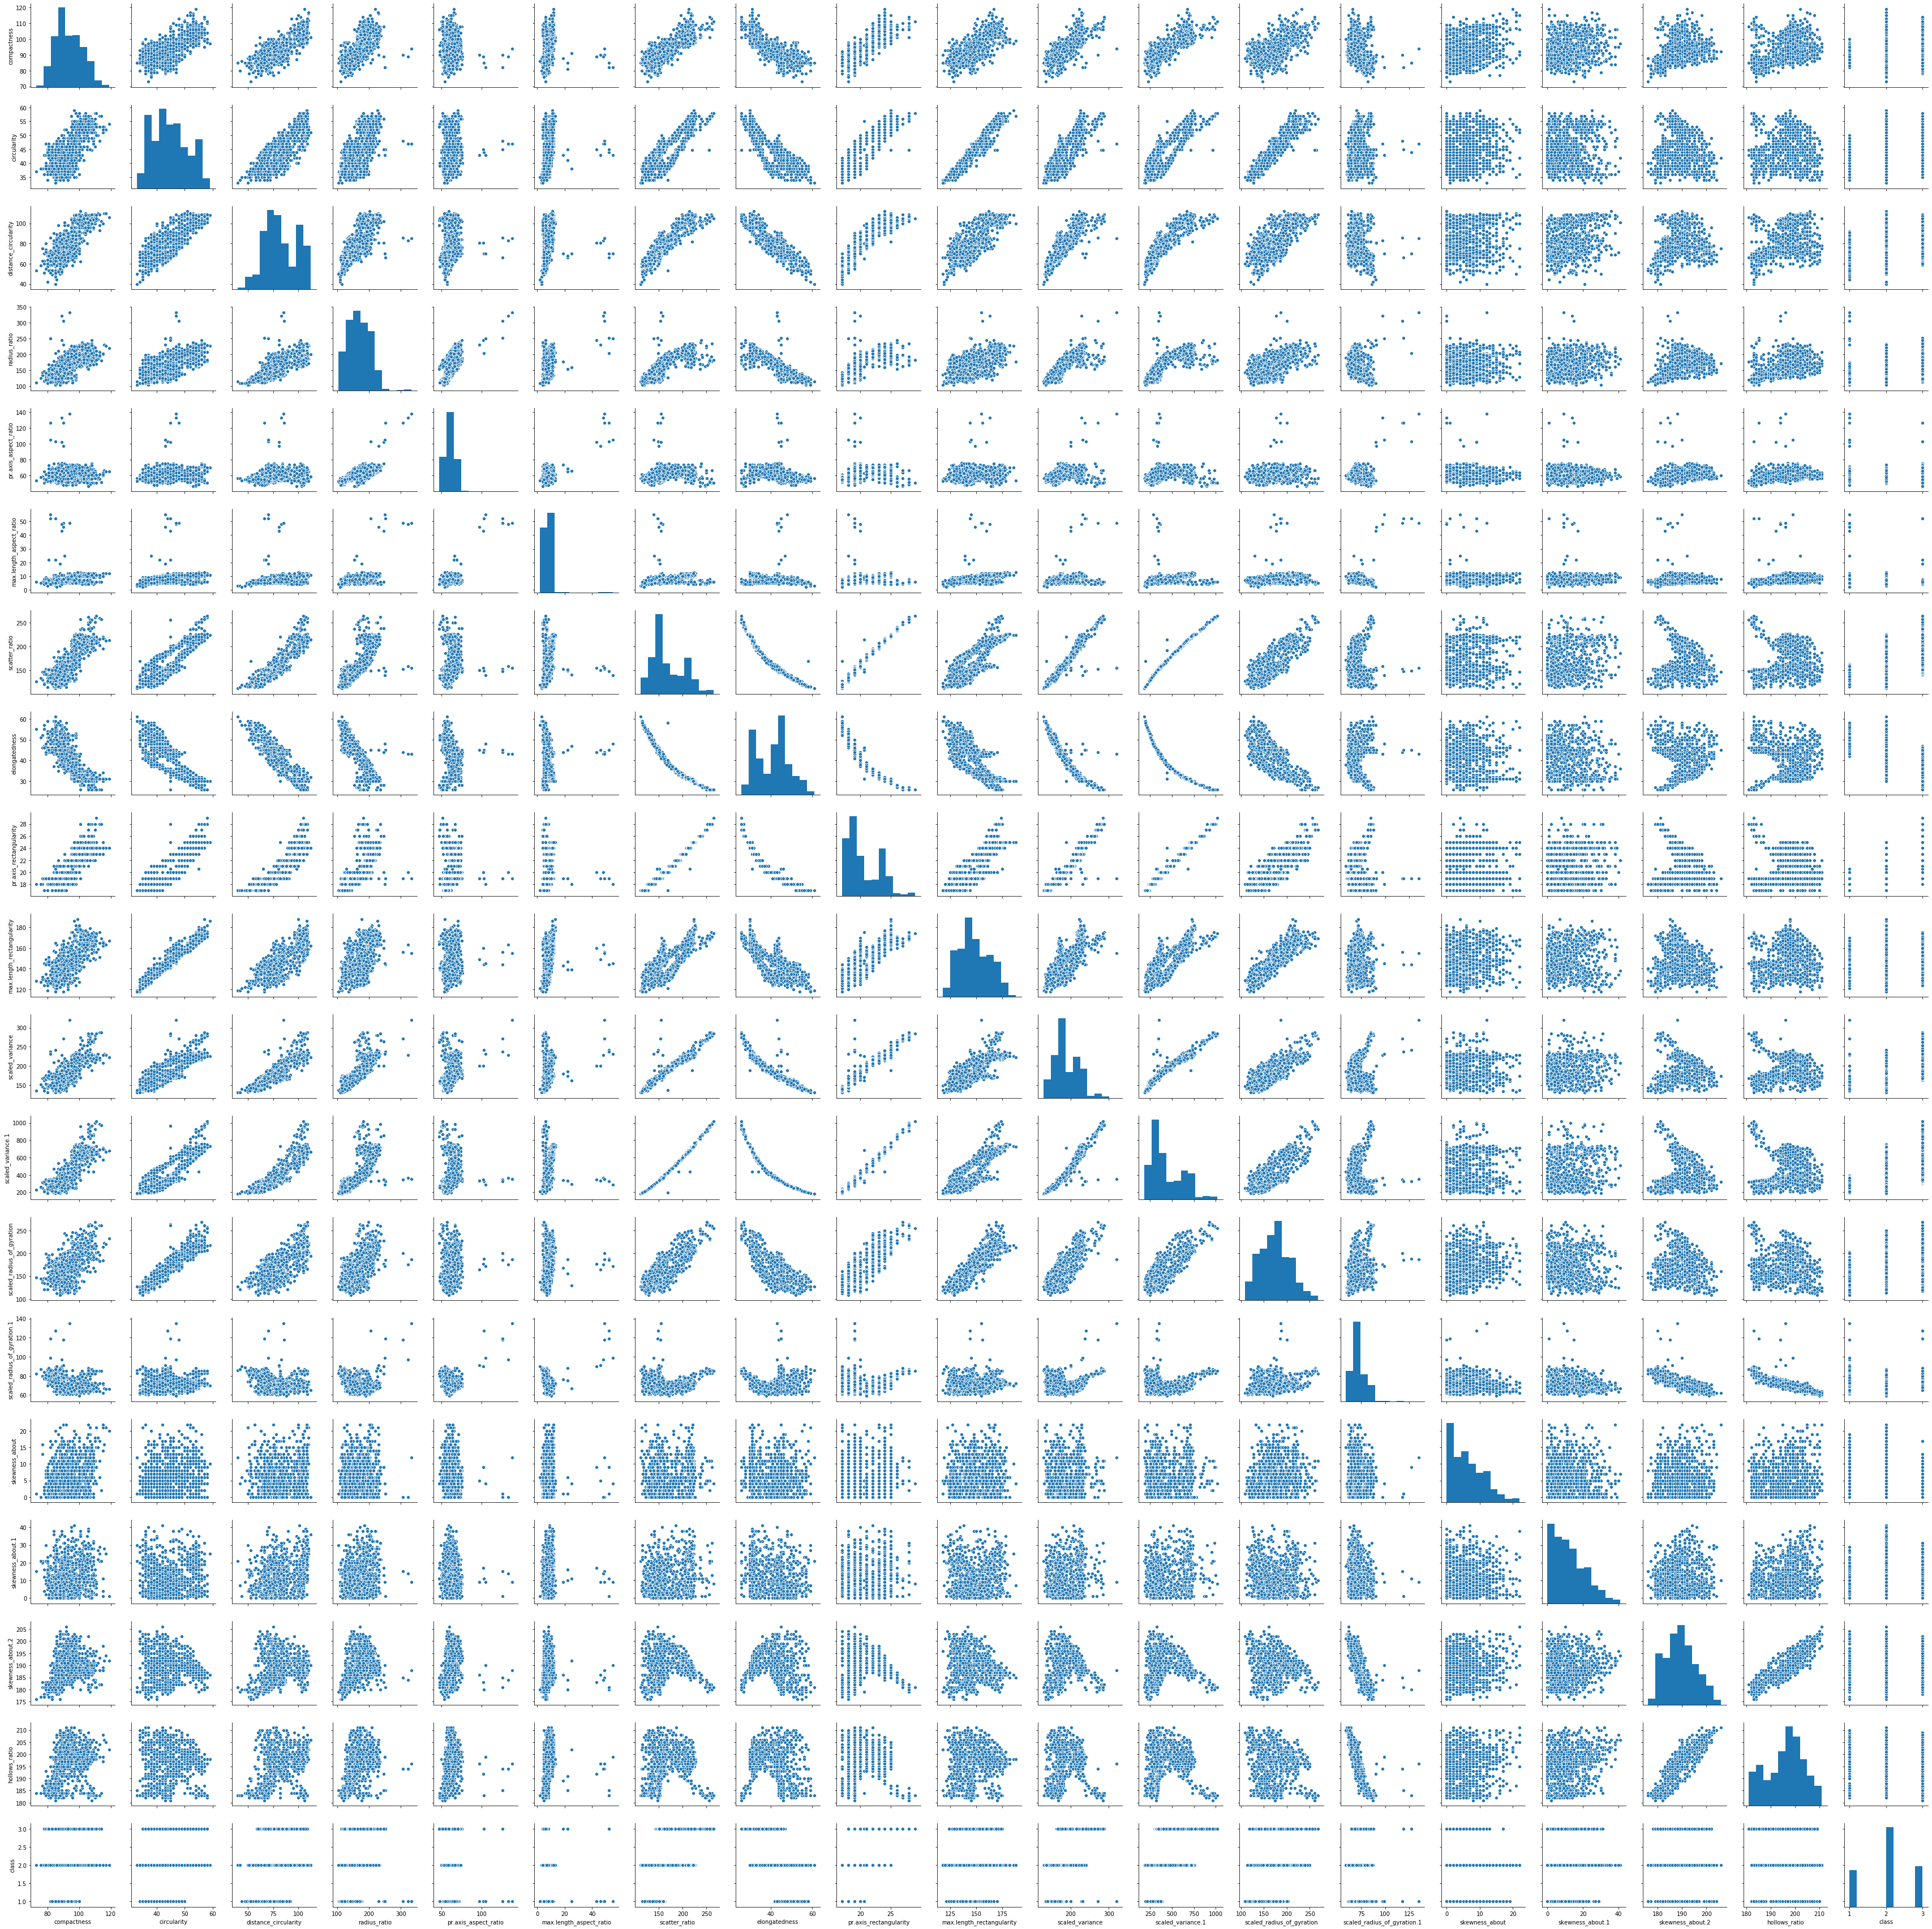

In [11]:
sns.pairplot(vehicle_data,hue=None)

<ol>
    
    By looking into the above plot, we can see that there are possible outliers in below columns
      radius_ratio ,
      pr.axis_aspect_ration,
      max.length_aspect_ration,
      scaled_variance,
      scaled_radius_of_gyration.1
###### Removing the Outliers

In [12]:
for x in vehicle_data:
    q1= vehicle_data[x].quantile(0.25)
    q3= vehicle_data[x].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    vehicle_data[x] = np.where(((vehicle_data[x] < fence_low) | (vehicle_data[x] > fence_high)), vehicle_data[x].median(), vehicle_data[x])

In [13]:
corr=vehicle_data.corr()
corr

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.685421,0.789909,0.721988,0.193100,0.499928,0.812235,-0.788643,0.813636,0.676143,0.770575,0.808092,0.585156,-0.248242,0.196883,0.156722,0.298526,0.365552,0.033796
circularity,0.685421,1.000000,0.793016,0.638393,0.202738,0.560067,0.848207,-0.821901,0.844972,0.961943,0.803291,0.830089,0.926888,0.069350,0.136594,-0.010078,-0.105645,0.045318,0.159804
distance_circularity,0.789909,0.793016,1.000000,0.794294,0.244306,0.666647,0.904400,-0.911435,0.893128,0.774669,0.870051,0.885282,0.705953,-0.230187,0.099014,0.262354,0.145563,0.332095,0.064902
radius_ratio,0.721988,0.638393,0.794294,1.000000,0.650738,0.463999,0.769693,-0.825686,0.743994,0.579807,0.786985,0.762029,0.550987,-0.390628,0.035738,0.179702,0.405705,0.491694,0.213875
pr.axis_aspect_ratio,0.193100,0.202738,0.244306,0.650738,1.000000,0.150277,0.194212,-0.298492,0.162831,0.147896,0.207884,0.197112,0.148793,-0.321697,-0.056127,-0.021289,0.400841,0.415725,0.209490
max.length_aspect_ratio,0.499928,0.560067,0.666647,0.463999,0.150277,1.000000,0.490360,-0.504032,0.488316,0.642713,0.401572,0.464533,0.397329,-0.336639,0.081637,0.141861,0.083613,0.413174,-0.352958
scatter_ratio,0.812235,0.848207,0.904400,0.769693,0.194212,0.490360,1.000000,-0.970723,0.989370,0.808356,0.960513,0.981244,0.799266,0.010024,0.064098,0.212351,0.005167,0.118448,0.288904
elongatedness,-0.788643,-0.821901,-0.911435,-0.825686,-0.298492,-0.504032,-0.970723,1.000000,-0.949077,-0.775519,-0.947980,-0.950135,-0.766029,0.079526,-0.046310,-0.184284,-0.114727,-0.216719,-0.339348
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.743994,0.162831,0.488316,0.989370,-0.949077,1.000000,0.811447,0.947676,0.974917,0.797068,0.026627,0.072310,0.213838,-0.018990,0.099191,0.258479
max.length_rectangularity,0.676143,0.961943,0.774669,0.579807,0.147896,0.642713,0.808356,-0.775519,0.811447,1.000000,0.750446,0.791060,0.866425,0.053131,0.130585,0.004423,-0.104254,0.076770,0.032399


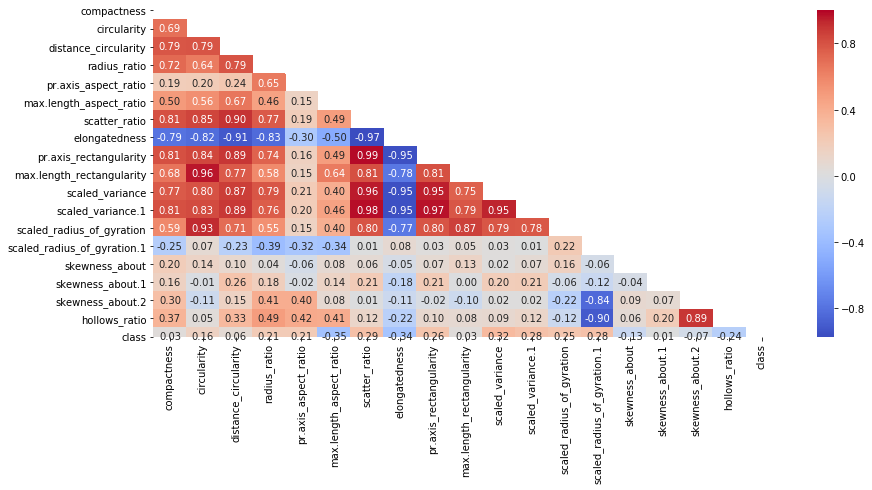

In [14]:
plt.figure(figsize=(14,6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
a = sns.heatmap(corr,mask=mask,annot=True,cmap='coolwarm',fmt='.2f')

<ol>
    
    From the above figure and data, we can see high correlation considering the correlation > 0.90 are between 
    1) circularity and max.length_rectangularity has around .96 correlation
    2) circularity and scaled_radius_of_gyration has a correlation of 0.93
    So the columns max.length_rectangularity and scaled_radius_of_gyration can be dropped by keeping circularity
    
    3) distance_circularity has 0.91 correlation with scatter_ratio
    4) scatter_ratio has a very high correlation of 0.99 with pr.axis_rectangularity
    5) scatter_ratio has a very high correlation of 0.96 with scaled_variance
    6) scatter_ratio has a very high correlation of 0.98 with scaled_variance.1
    7) pr.axis_rectangularity has very high correlation with scaled_variance and scaled_variance.1
    So scatter_ratio can be kept for further processing and distance_circularity, pr.axis_rectangularity, scaled_variance and scaled_variance.1 can be dropped 
    

In [15]:
# Split into Train and Test
from sklearn.model_selection import train_test_split
X=vehicle_data.drop(['max.length_rectangularity','scaled_radius_of_gyration','distance_circularity','pr.axis_rectangularity', 'scaled_variance','scaled_variance.1','class'],axis=1)
y=vehicle_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

### Support vector machine model building

In [16]:
from sklearn import svm
clf= svm.SVC(gamma=0.025,C=3)

In [17]:
clf.fit(X_train,y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
svm_predict=clf.predict(X_test)

###### Checking the accuracy

In [19]:
from sklearn import metrics
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,svm_predict))

Accuracy Score:
0.7007874015748031


###### K Fold corss validaton( Optional)

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [21]:
kfold=KFold(n_splits=10,random_state=1)
Kscore=cross_val_score(clf,X,y,cv=kfold)

In [22]:
print("Accuracy: %0.2f (+/- %0.2f)" % (Kscore.mean(), Kscore.std() * 2))

Accuracy: 0.71 (+/- 0.09)


#### Reducing the columns using PCA

In [23]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [24]:
X=vehicle_data.drop(['class'],axis=1)
y=vehicle_data['class']

In [25]:
#Scaling the X variables
Xscaled=X.apply(zscore)
Xscaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.300420,1.932830,0.912212,-0.208038,0.136580,-0.225160,0.758332,-0.401938,-0.338519,0.285618,-0.317988,-0.032895,0.386956,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.851200,-0.740875,0.427456,-0.599893,0.520853,-0.611739,-0.344578,-0.595419,-0.619796,-0.513719,0.006954,0.623522,0.161529,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.265291,0.863348,0.912212,1.148382,-1.144331,0.934576,0.689401,1.113664,1.131015,1.392391,0.169425,1.717551,-0.402038,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.290952,0.328607,0.427456,-0.750606,0.648945,-0.611739,-0.344578,-0.917888,-0.740344,-1.466773,-1.455286,-0.032895,-0.289325,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.140792,-0.027887,-0.057300,-0.599893,0.520853,-0.611739,-0.275646,1.694107,-0.648498,0.408593,0.006954,0.623522,-0.176611,-1.450677,-1.699181


In [26]:
pca=PCA(n_components=18,random_state=1)
pca.fit(Xscaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
print(pca.explained_variance_)

[9.75341259e+00 3.35358815e+00 1.19269480e+00 1.13414646e+00
 8.83670742e-01 6.65920199e-01 3.17652965e-01 2.27359876e-01
 1.28737895e-01 7.95035982e-02 7.31367700e-02 6.45023287e-02
 3.96125443e-02 3.13454635e-02 2.90940229e-02 2.20443539e-02
 1.89164422e-02 5.96258031e-03]


In [28]:
print(pca.explained_variance_ratio_)

[5.41215763e-01 1.86090228e-01 6.61824995e-02 6.29336588e-02
 4.90347897e-02 3.69518366e-02 1.76265272e-02 1.26161738e-02
 7.14365127e-03 4.41164569e-03 4.05835110e-03 3.57922694e-03
 2.19809561e-03 1.73935623e-03 1.61442405e-03 1.22323871e-03
 1.04967124e-03 3.30862908e-04]


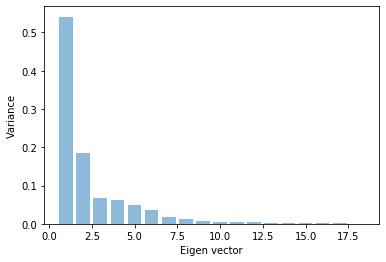

In [29]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.ylabel('Variance')
plt.xlabel('Eigen vector')
plt.show()

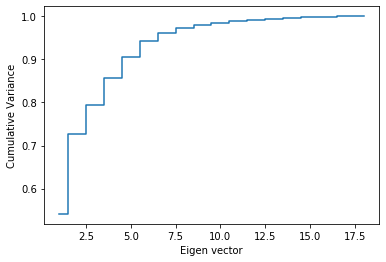

In [30]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Cumulative Variance')
plt.xlabel('Eigen vector')
plt.show()

##### Dimensionality Reduction

From the above figure, 95% range falls with the a dimention around 7. So choosing 7 variables can explain 95% of the variation in the original data

In [31]:
reduced_pca=PCA(n_components=7,random_state=1)
reduced_pca.fit(Xscaled)
Xreduced=reduced_pca.transform(Xscaled)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(Xreduced, y,test_size=0.30, random_state=1)

In [33]:
pca_clf= svm.SVC(gamma=0.025,C=3)
pca_clf.fit(X_train,y_train)
svm_predict_pca=pca_clf.predict(X_test)

In [34]:
print('Accuracy Score After PCA:')
print(metrics.accuracy_score(y_test,svm_predict_pca))

Accuracy Score After PCA:
0.9251968503937008


###### Conclusion
The Accuracy increased considerabily from 70% to 92.5% when using PCA to reduced the number of variables for prediction. The initial SVM with Manual reduction of Column did not give a good accuracy as the one with PCA. There could be columns which could negatively impact the prediction which are removed using the PCA to fit with 95% variance 